# Разработка модели классификации на фродовые заказы


Ключевые этапы:
* Изучить предоставленные данные и провести первичный анализ (EDA).
* Разработать и обучить модель классификации (учитывая сильный дисбаланс классов 1:10).
* Оценить качество модели с фокусом на метрики для миноритарного класса.
* Реализовать прототип сервиса (django/FastAPI/Flask/Streamlit/Gradio или др.):
  * Принимает табличные данные,
  * Возвращает предсказанную метку и вероятность.
* Подготовить отчёт, описав подход, ключевые результаты и инструкцию по запуску.


## Структура данных

Датасет представлен в табличном формате и содержит следующие колонки:

`user_id` - идентификатор пользователя

`created_date` - дата создания записи

`nm_id` - идентификатор товара

`total_ordered` - общее количество заказанных товаров

`payment_type` - тип оплаты

`is_paid` - флаг оплаты (булево значение)

`count_items` - количество товаров за последнее время

`unique_items` - количество уникальных товаров за последнее время

`avg_unique_purchase` - среднее количество уникальных покупок за последнее время

`is_courier` - флаг доставки курьером

`nm_age` - возраст товара

`Distance` - расстояние

`days_after_registration` - дни после регистрации

`number_of_orders` - количество заказов

`number_of_ordered_items` - количество заказанных товаров

`mean_number_of_ordered_items` - среднее количество заказанных товаров

`min_number_of_ordered_items` - минимальное количество заказанных товаров

`max_number_of_ordered_items` - максимальное количество заказанных товаров

`mean_percent_of_ordered_items` - средний процент заказанных товаров

`target` - целевая переменная (0 - не требуется блокировка, 1 - требуется блокировка)

`service` - тип региона

Датасет имеет сильный дисбаланс классов в соотношении 1:10 (класс 1 встречается значительно реже).


## Требования к задаче

**Анализ данных (EDA):**
* Исследовать распределение признаков
* Проанализировать дисбаланс (сколько объектов каждого класса)
* Выявить корреляции между признаками
* Проверить наличие пропущенных значений и выбросов

**Предобработка данных:**
* Обработка пропущенных значений
* Кодирование категориальных признаков
* Масштабирование числовых признаков
* Работа с дисбалансом классов (SMOTE, undersampling, class weights и т.д.)

**Построение модели:**
* Любой фреймворк (scikit-learn, XGBoost, LightGBM, CatBoost и т.д.)
* Можно использовать ансамблевые методы
* Учитывать баланс между качеством и скоростью

**Оценка качества:**
* Основные метрики для миноритарного класса: Precision и Recall
* Дополнительные метрики: F1-score, PR-AUC, ROC-AUC
* Обязательная оценка Confusion Matrix

**Подготовка результатов:**
* Валидация: подбираем гиперпараметры
* Тест: итоговая метрика

**Развёртывание сервиса:**
* REST API (Flask/FastAPI) либо UI (Streamlit/Gradio)
* /predict эндпоинт, возвращающий {"prediction": 0 или 1, "confidence": float}

**Отчёт:**
* Описание подхода, модели, метрик
* Результаты на тесте


## Методика оценки

**Оценка качества модели для миноритарного (целевого) класса:**
* Неудовлетворительный результат:
  * Recall < 0.1 при Precision < 0.75
* Хороший результат:
  * 0.1 ≤ Recall при 0.8 ≤ Precision 
* Победитель:
  * Recall ≥ 0.1 при максимальном Precision

**Дополнительные метрики:**
* F1-score — комбинированная метрика Precision и Recall (используется для сравнения моделей)
* PR-AUC — особенно важна для несбалансированных данных
* ROC-AUC — оценка разделительной способности модели


### Рассмотрим распределение признаков

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('./data/df_test.csv')
# Distribution
# Setting the style for the plots
sns.set_style('whitegrid')

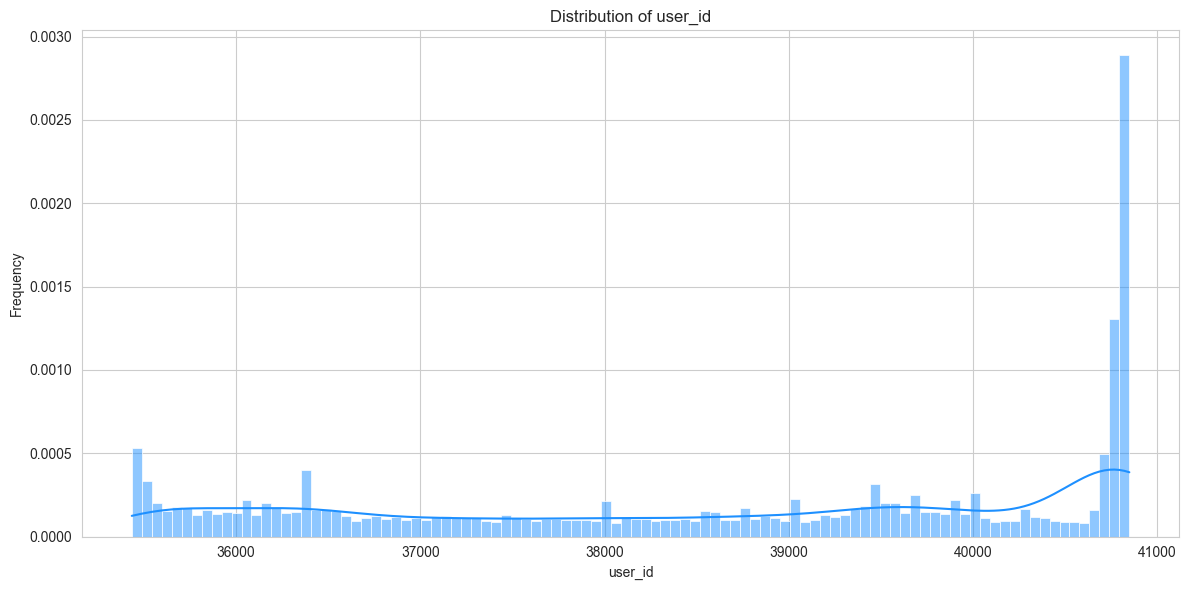

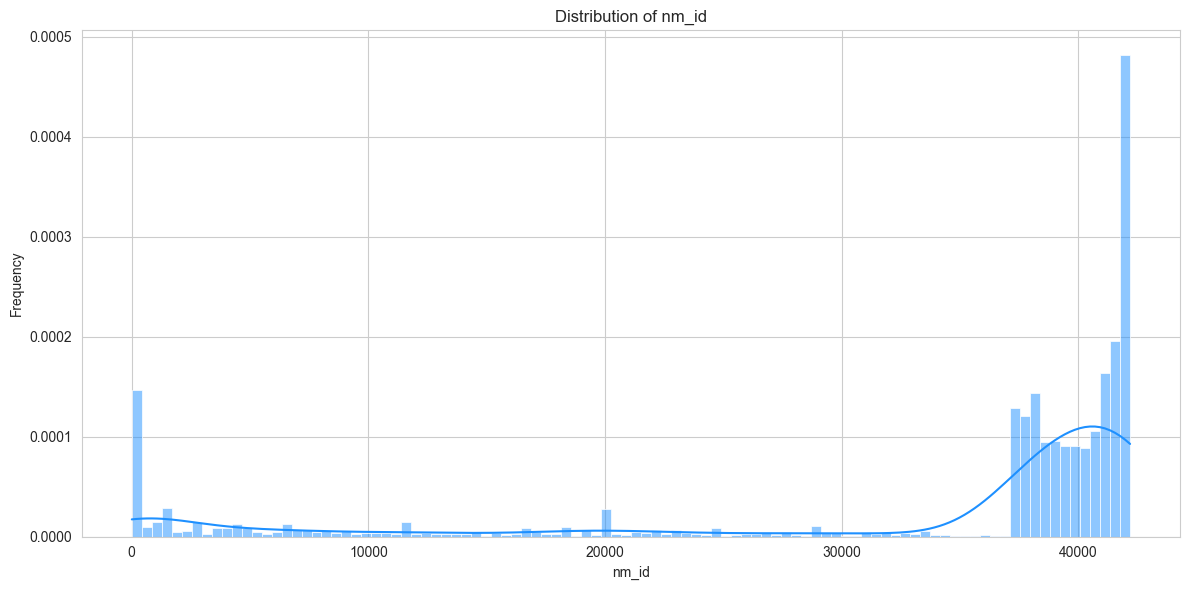

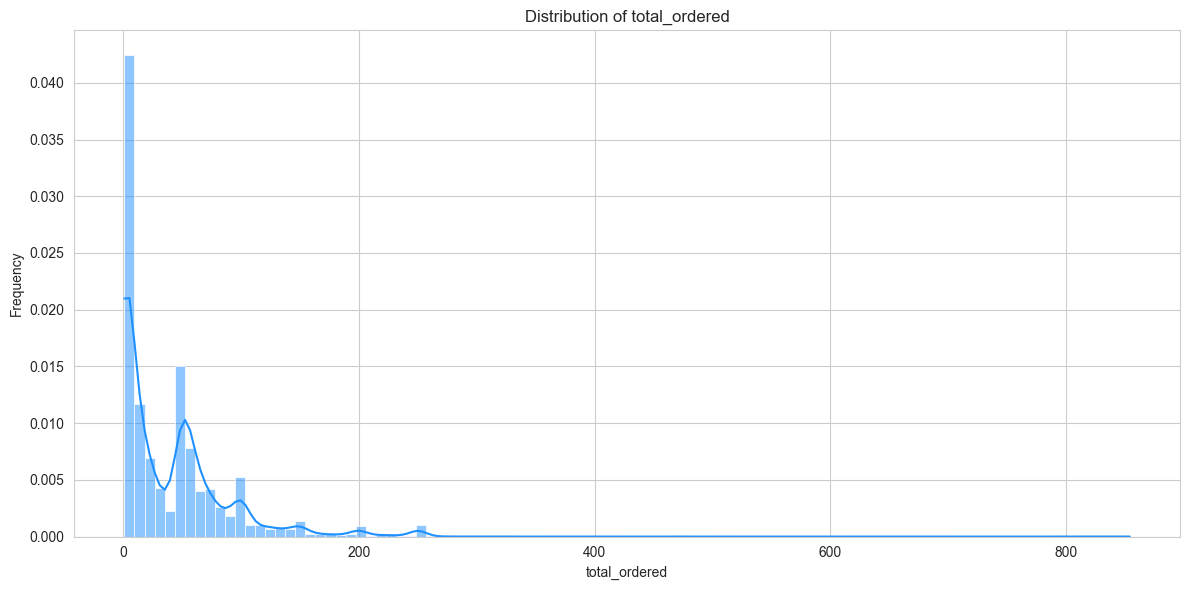

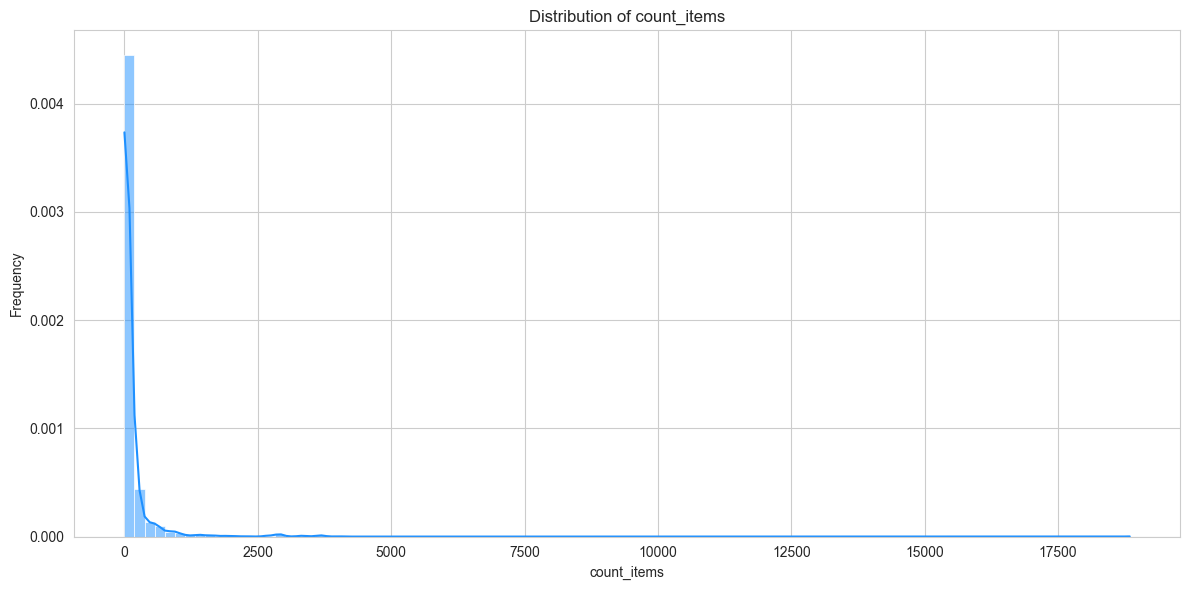

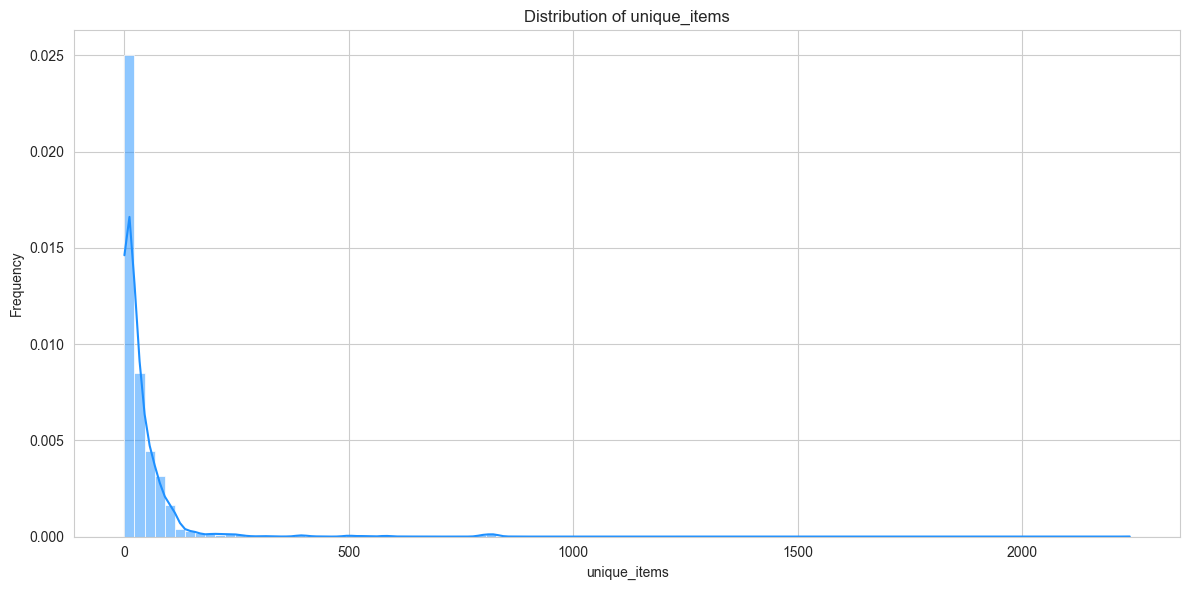

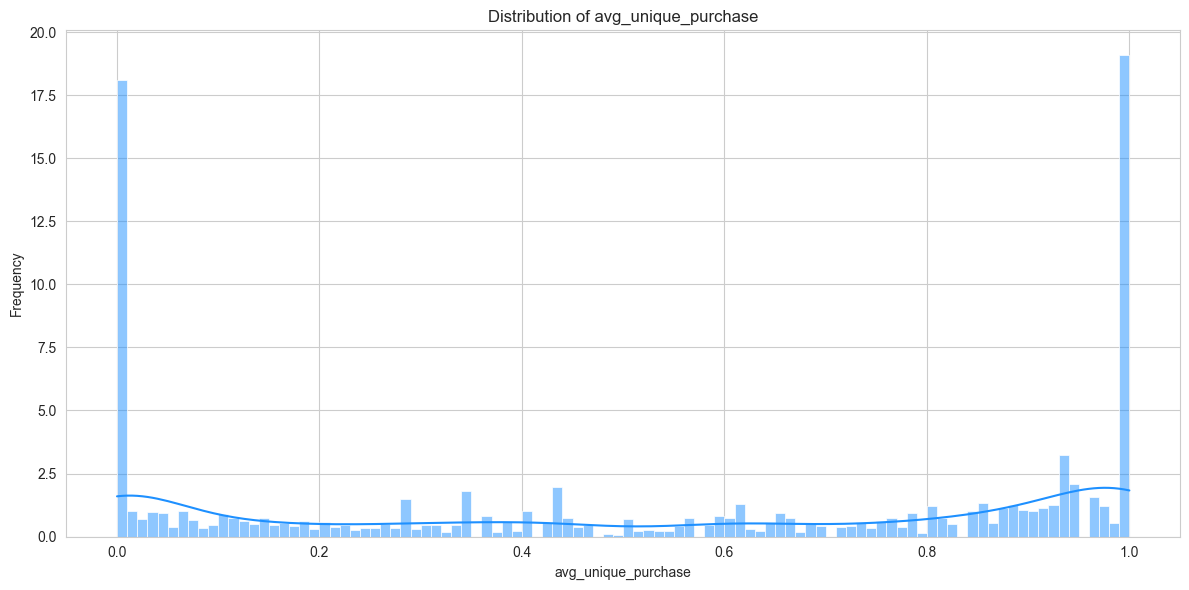

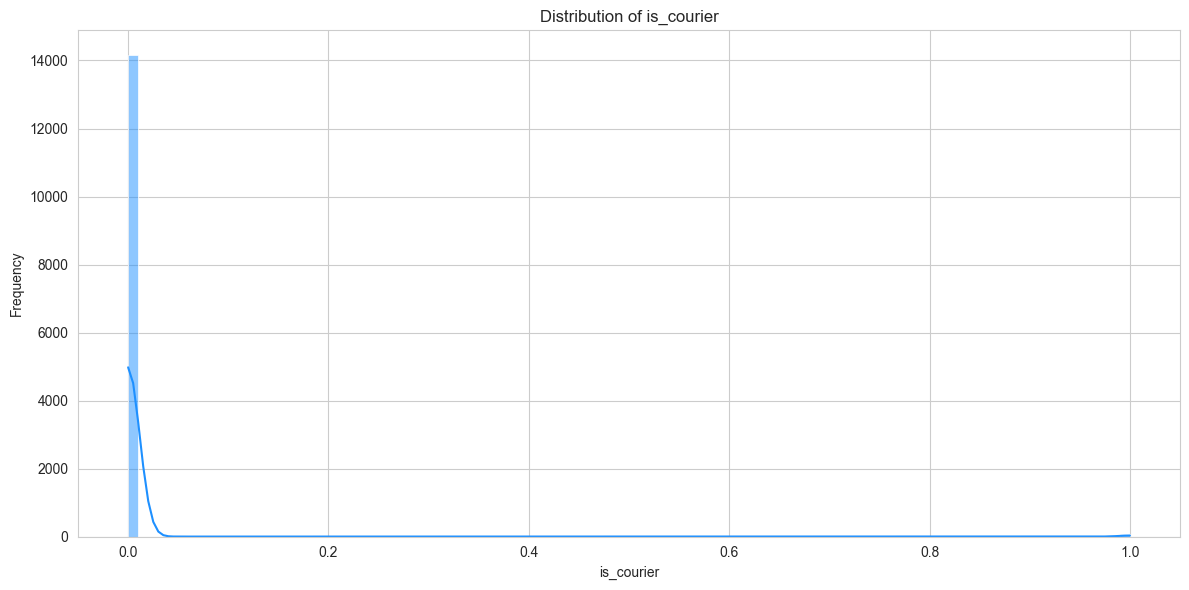

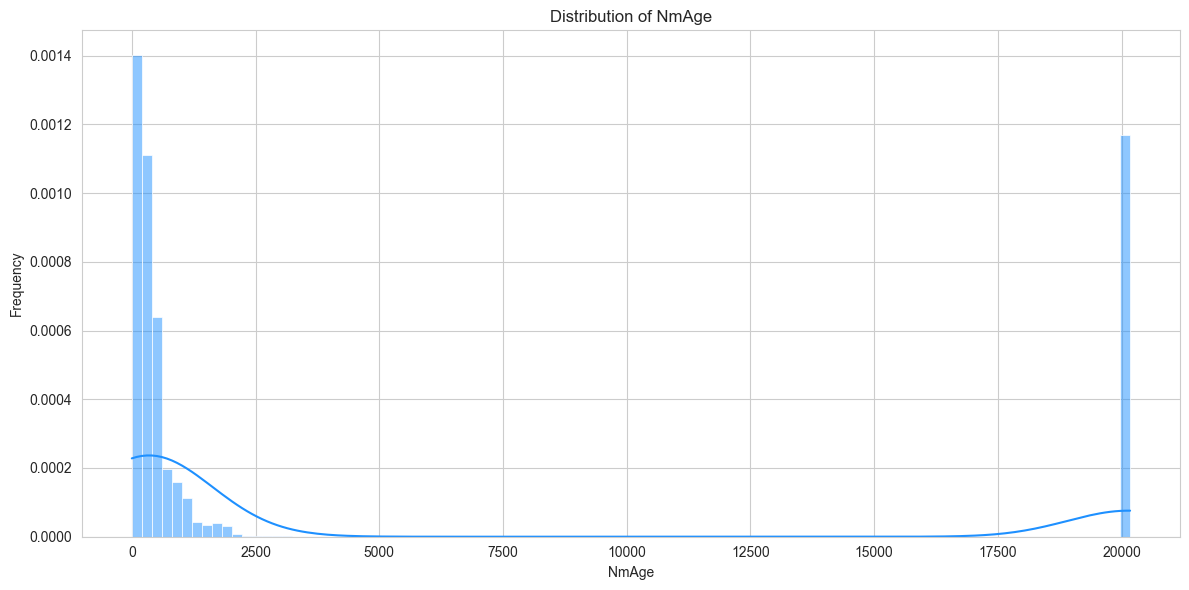

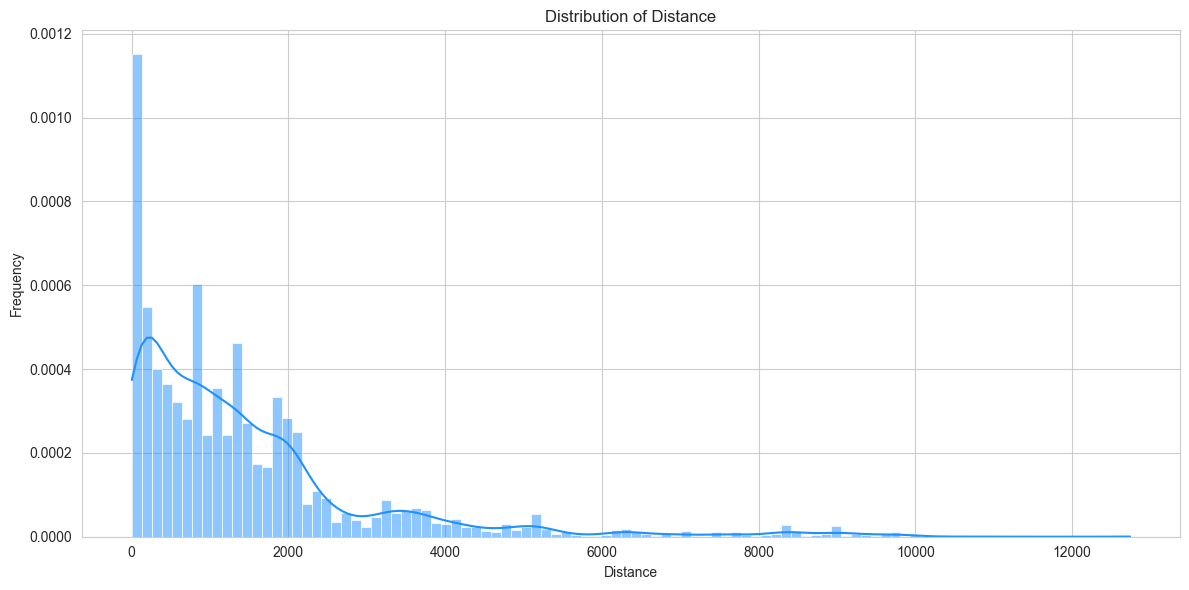

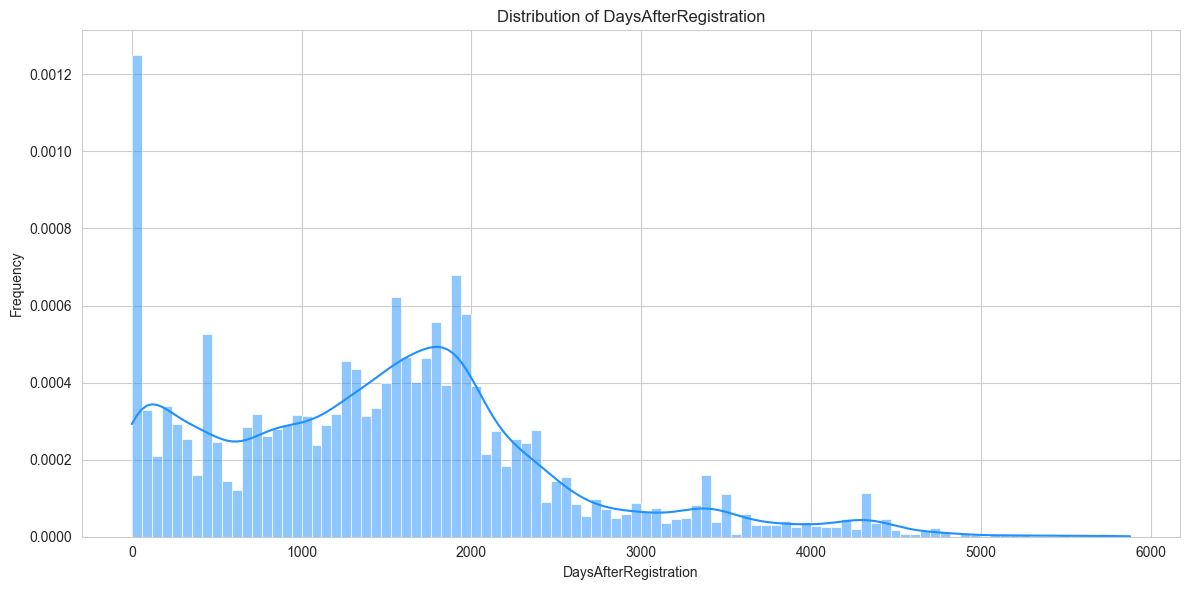

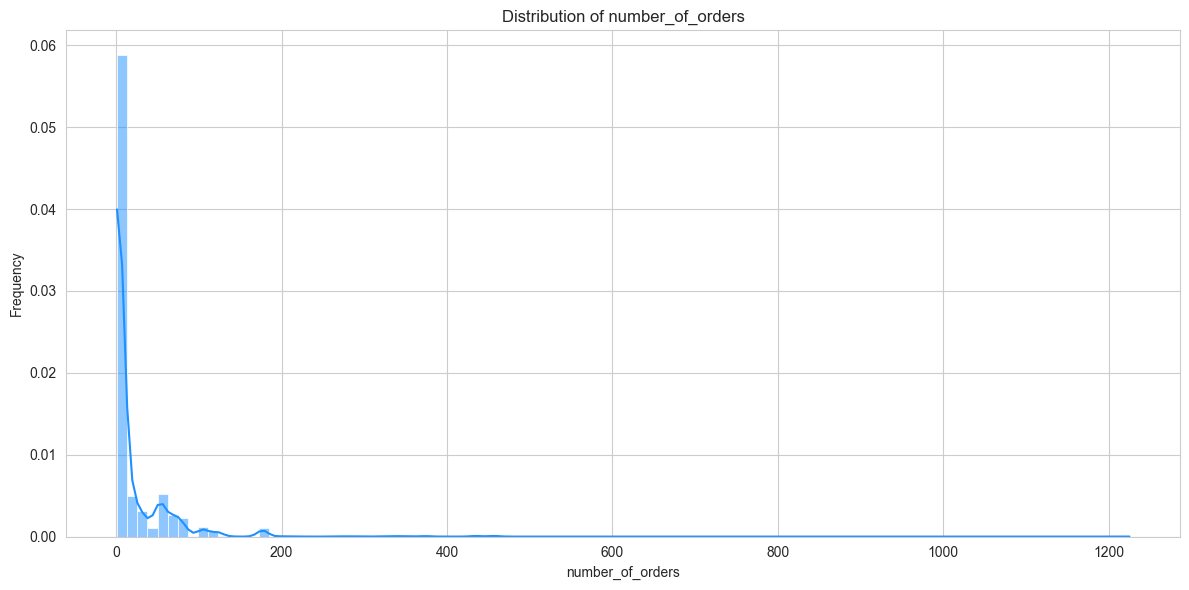

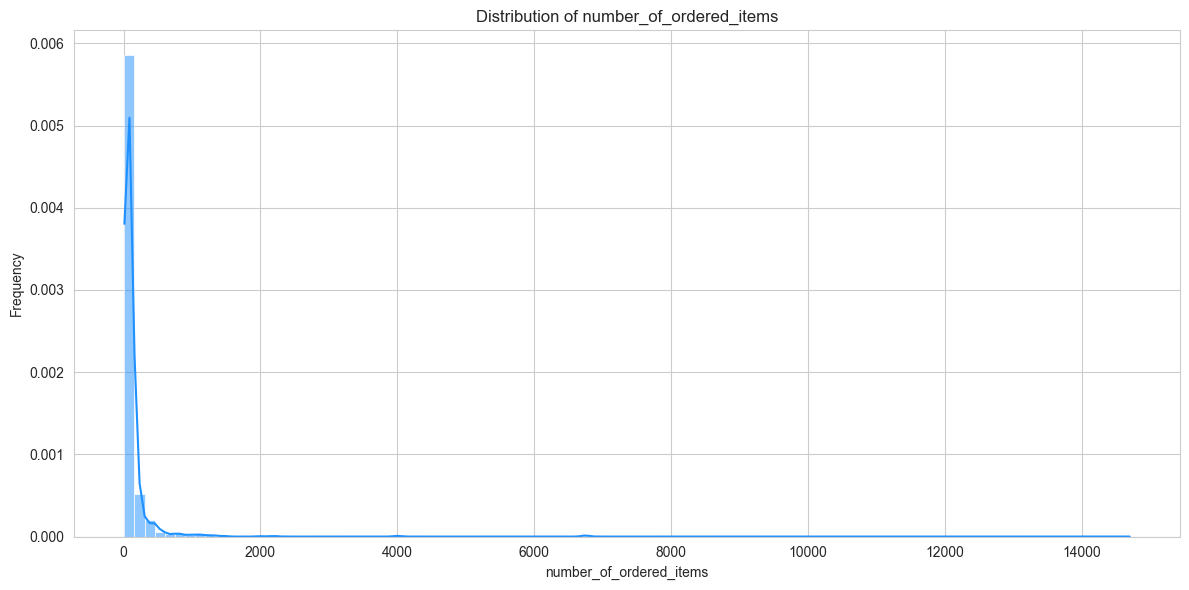

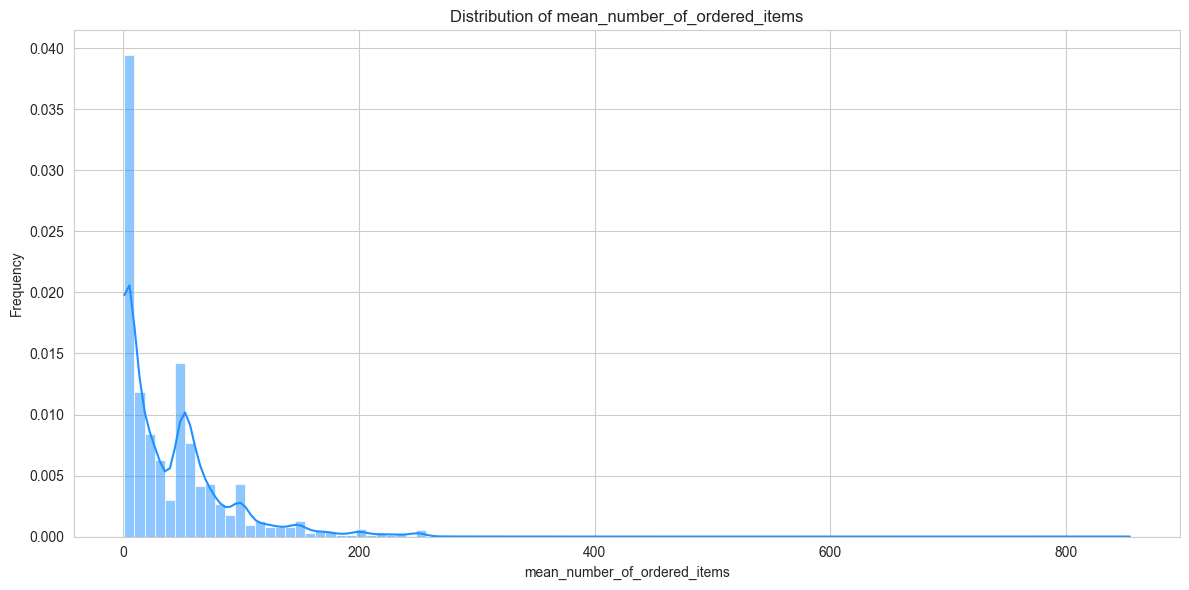

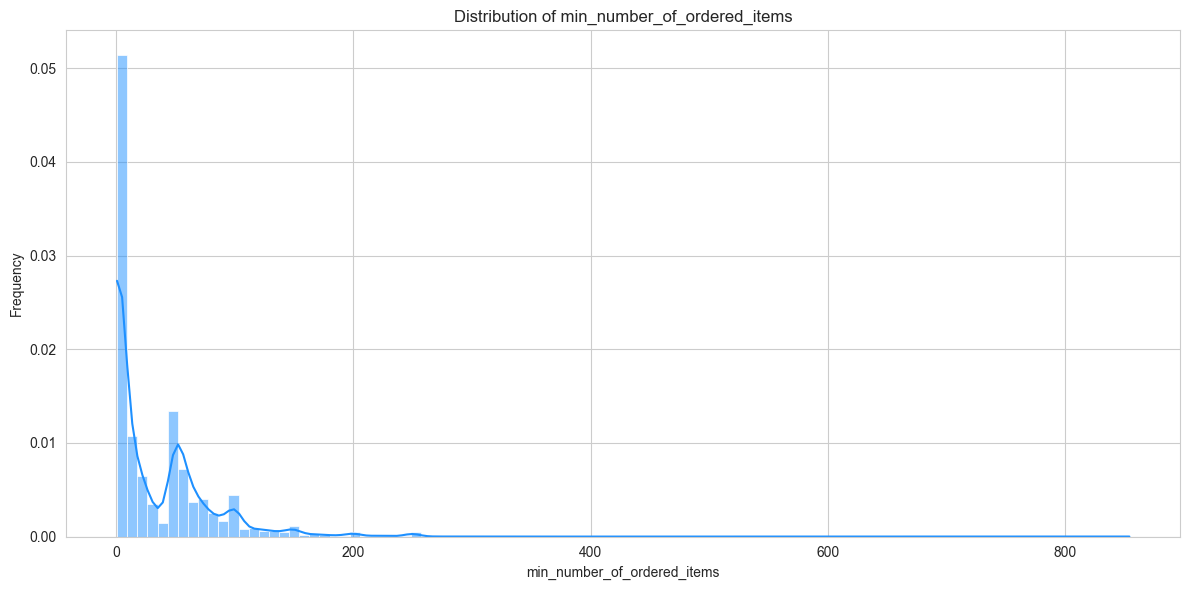

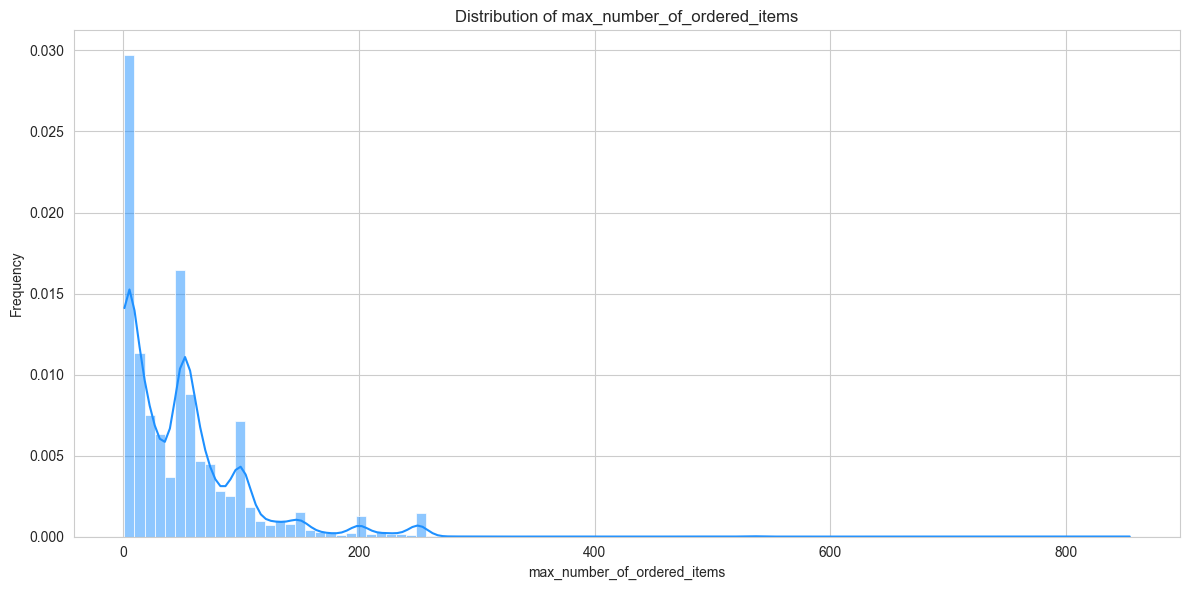

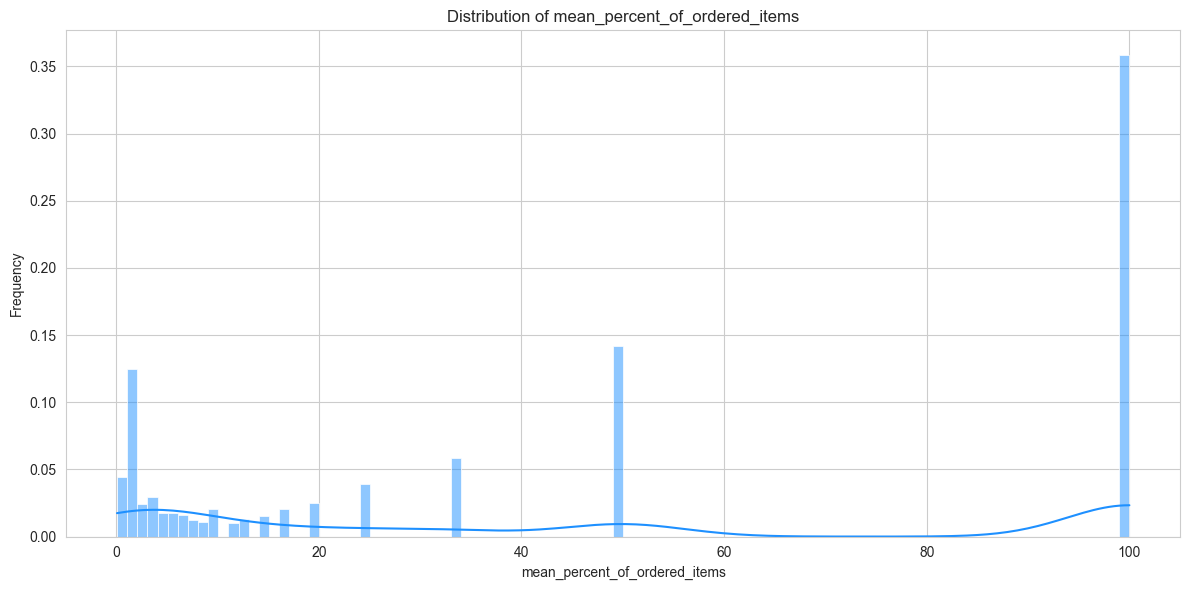

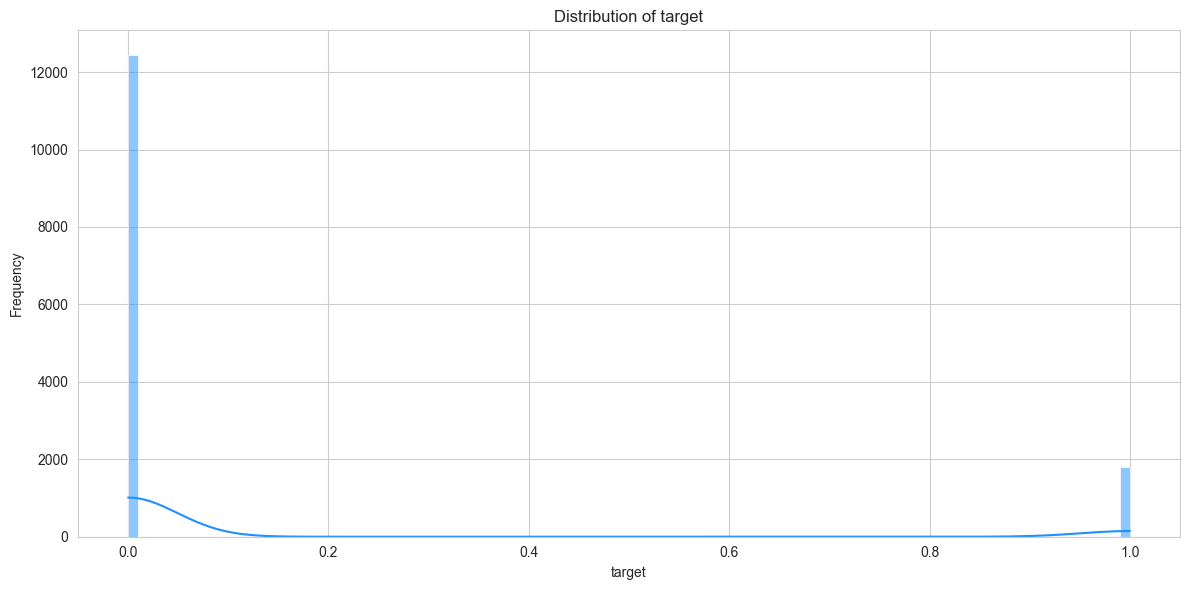

In [15]:
# Filtering out numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# plt.figure(figsize=(20, 40)) # прошлый формат

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    
    plt.figure(figsize=(12, 6))

    # plt.subplot(len(numerical_columns), 1, i) # прошлый формат
        
    sns.histplot(
        data[col],
        color='dodgerblue',
        # bins='auto',  #из-за этого долго считается
        bins = 100,
        kde=True,     
        edgecolor='white',  
        linewidth=0.5,      
        stat='density' if data[col].nunique() > 20 else 'count'  
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# plt.tight_layout() # прошлый формат
# plt.show()

***тут бы пару слов об увиденном***

In [ ]:
missing_values = data.isnull().sum() # Проверяю пропуски

data_types = data.dtypes

missing_values, data_types

(user_id                          0
 nm_id                            0
 CreatedDate                      0
 service                          0
 total_ordered                    0
 PaymentType                      0
 IsPaid                           0
 count_items                      0
 unique_items                     0
 avg_unique_purchase              0
 is_courier                       0
 NmAge                            0
 Distance                         0
 DaysAfterRegistration            0
 number_of_orders                 0
 number_of_ordered_items          0
 mean_number_of_ordered_items     0
 min_number_of_ordered_items      0
 max_number_of_ordered_items      0
 mean_percent_of_ordered_items    0
 target                           0
 dtype: int64,
 user_id                            int64
 nm_id                              int64
 CreatedDate                       object
 service                           object
 total_ordered                      int64
 PaymentType       

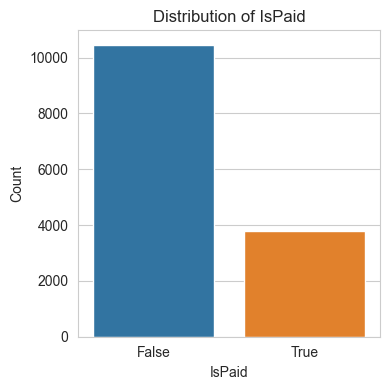

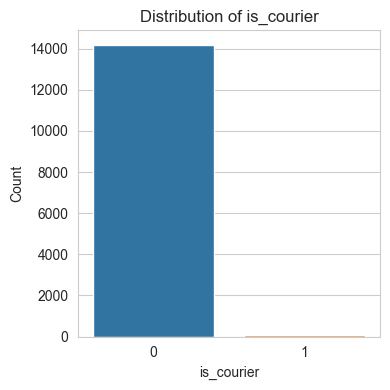

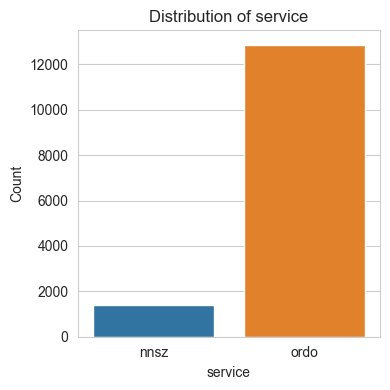

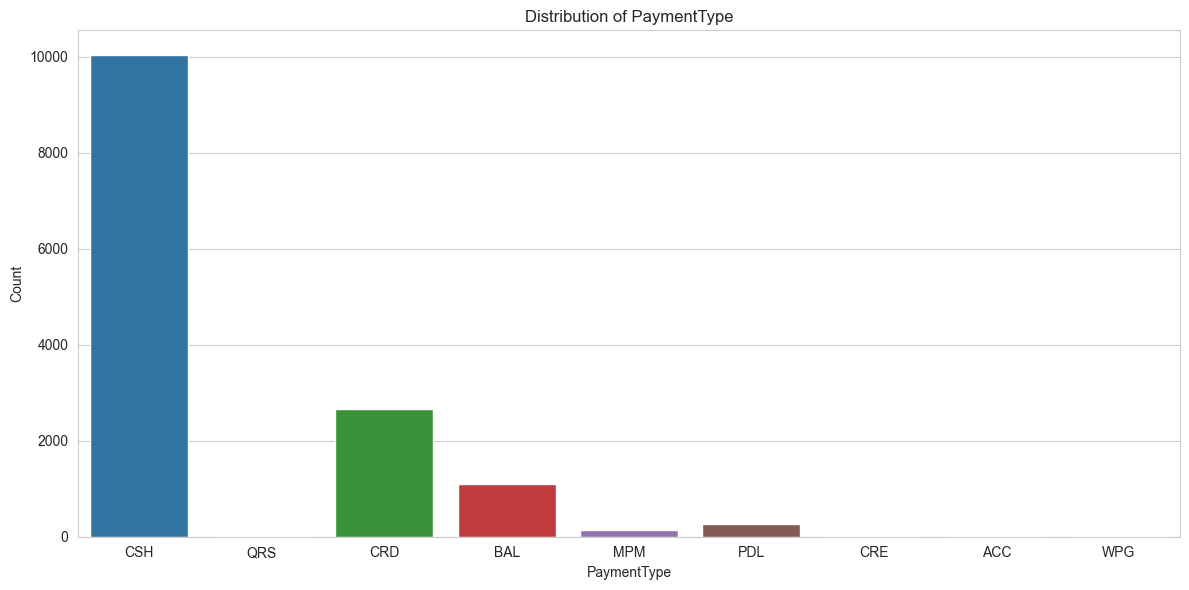

In [26]:
# Distribution
# Setting the style for the plots
# sns.set_style('whitegrid') # это уже было сверху

# Distribution of all object format values
object_columns = list(data.select_dtypes(include=['bool']).columns) + ["is_courier", "service", "PaymentType"]

# Plotting count plots for each object column
for i, col in enumerate(object_columns, 1):
    plt.figure(figsize=(4, 4)) if len(data[col].unique()) <= 2 else plt.figure(figsize=(12, 6))

    # plt.subplot(2, 3, i)
    sns.countplot(x=data[col], legend=False, hue=data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score, f1_score

from catboost import Pool, CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

RANDOM_STATE=42

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# Преобразование строки в datetime с учётом временной зоны (если есть '+03:00')
data['CreatedDate_datetime'] = pd.to_datetime(data['CreatedDate'])
# Конвертация datetime в timestamp (Unix-время, float)
data['CreatedDate_timestamp'] = data.CreatedDate_datetime.values.astype(np.int64) // 10 ** 9

In [ ]:
#Отбирать меньше наблюдений, чтобы быстрее считалось
data_percent, _ = train_test_split(
    data,
    train_size=0.8,
    stratify=data['target'], 
    random_state=RANDOM_STATE
)

In [ ]:
print(data['target'].value_counts()/data.shape[0])
print(data_percent['target'].value_counts()/data_percent.shape[0])

target
0    0.8735
1    0.1265
Name: count, dtype: float64
target
0    0.873502
1    0.126498
Name: count, dtype: float64


In [ ]:
X = data_percent.drop(['target', 'CreatedDate_datetime', 'CreatedDate', 'CreatedDate_timestamp'] , axis=1)
y = data_percent.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y, random_state = RANDOM_STATE)

In [ ]:
X

,user_id,nm_id,service,total_ordered,PaymentType,IsPaid,count_items,unique_items,avg_unique_purchase,is_courier,NmAge,Distance,DaysAfterRegistration,number_of_orders,number_of_ordered_items,mean_number_of_ordered_items,min_number_of_ordered_items,max_number_of_ordered_items,mean_percent_of_ordered_items,CreatedDate_timestamp
67718,4591,36669,ordo,4,CRD,True,6,6,1.00,0,305,5085,93,3,12,4.000000,4,4,33.333333,1736457974
71476,34958,36829,nnsz,2,CSH,False,0,0,0.00,0,157,637,514,9,15,1.666667,1,2,11.111111,1732895722
84887,8233,9356,nnsz,1,CSH,False,0,0,0.00,0,106,3228,1586,4,113,28.250000,1,70,25.000000,1736499135
98747,32802,36267,nnsz,1,CRD,True,4827,79,0.01,0,30,713,243,91,95,1.043956,1,2,1.098901,1734948788
19712,3322,3669,ordo,56,CSH,False,1515,92,0.06,0,640,217,1871,1,56,56.000000,56,56,100.000000,1732859814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85753,34974,36842,nnsz,1,CSH,False,0,0,0.00,0,197,971,1093,24,25,1.041667,1,2,4.166667,1731486503
44956,1028,24812,ordo,20,BAL,True,824,46,0.05,0,978,177,1601,1,20,20.000000,20,20,100.000000,1733291788
30377,18398,20989,ordo,50,BAL,True,152,85,0.55,0,20109,278,2329,1,50,50.000000,50,50,100.000000,1737435396
30917,18649,7376,ordo,48,CRD,True,740,569,0.76,0,214,1595,716,2,72,36.000000,24,48,50.000000,1733216094


In [ ]:
params = {
    'max_depth': list(range(7, 15)),
    'n_estimators': [50, 100, 150],
    'random_state' : [RANDOM_STATE]
}

# Подготовка данных
cat_features = ['service', 'PaymentType', 'IsPaid'] # индексы категориальных признаков

cbc = CatBoostClassifier(random_state=RANDOM_STATE, 
                         cat_features=cat_features,
                         verbose=0)
grid_search_cv_clf_cat = GridSearchCV(cbc, params, cv=5,
                                    scoring='f1',
                                    n_jobs=-1,  # Используем все ядра процессора
                                    verbose=0,
                                    refit=True  # Переобучит модель на лучших параметрах
)
grid_search_cv_clf_cat.fit(X_train, y_train, verbose=False)

# Make predictions on the test set
y_pred = grid_search_cv_clf_cat.predict(X_test)

# Результаты
print(f"Лучший параметр глубина дерева: {grid_search_cv_clf_cat.best_params_}")
print(f"Лучшее F1 на кросс-валидации: {grid_search_cv_clf_cat.best_score_:.4f}")
results_df = pd.DataFrame(grid_search_cv_clf_cat.cv_results_)

# Выводим средние значения F1-score для каждой комбинации параметров
print(results_df[['params', 'mean_test_score', 'std_test_score']])

# Качество на тестовой выборке (если нужно)
y_pred_proba = grid_search_cv_clf_cat.predict_proba(X_test)[:, 1]
f1_score_ = f1_score(y_test, y_pred, average='weighted')
print(f"F1 на тестовой выборке: {f1_score_:.4f}")

Лучший параметр глубина дерева: {'max_depth': 14, 'n_estimators': 100, 'random_state': 42}
Лучшее F1 на кросс-валидации: 0.8992
                                               params  mean_test_score  \
0   {'max_depth': 7, 'n_estimators': 50, 'random_s...         0.838162   
1   {'max_depth': 7, 'n_estimators': 100, 'random_...         0.867533   
2   {'max_depth': 7, 'n_estimators': 150, 'random_...         0.867529   
3   {'max_depth': 8, 'n_estimators': 50, 'random_s...         0.849723   
4   {'max_depth': 8, 'n_estimators': 100, 'random_...         0.872780   
5   {'max_depth': 8, 'n_estimators': 150, 'random_...         0.872288   
6   {'max_depth': 9, 'n_estimators': 50, 'random_s...         0.859351   
7   {'max_depth': 9, 'n_estimators': 100, 'random_...         0.876368   
8   {'max_depth': 9, 'n_estimators': 150, 'random_...         0.882296   
9   {'max_depth': 10, 'n_estimators': 50, 'random_...         0.867194   
10  {'max_depth': 10, 'n_estimators': 100, 'random...     

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18442
           1       0.96      0.84      0.90      2671

    accuracy                           0.98     21113
   macro avg       0.97      0.92      0.94     21113
weighted avg       0.98      0.98      0.97     21113



In [ ]:
#Скачиваем тестовый датасет
data_test = pd.read_csv('df_test.csv')
data_test.head()

: 

In [ ]:
print(data_test['target'].value_counts()/data_test.shape[0])

target
0    0.873361
1    0.126639
Name: count, dtype: float64


In [ ]:
# Преобразование строки в datetime с учётом временной зоны (если есть '+03:00')
data_test['CreatedDate_datetime'] = pd.to_datetime(data_test['CreatedDate'])
data_test['day'] = data_test.CreatedDate_datetime.dt.day
data_test['hour'] = data_test.CreatedDate_datetime.dt.hour
data_test['weekday'] = data_test.CreatedDate_datetime.dt.weekday

: 

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
date_columns = ["day", "hour", "weekday"]
for i, col in enumerate(date_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=data[col], palette=['beige','dodgerblue', 'red'], legend=False, hue=data[col]) #'beige','dodgerblue', 'red' 'black', 'orange'
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')


print(f"\nМаксимальная дата {data.CreatedDate_datetime.max()}, \n Минимальная дата: {data.CreatedDate_datetime.min()}") # Не отследим годовую сезонность

In [ ]:
#Решил убрать время вообще пока что
X_ = data_test.drop(['target', 'CreatedDate_datetime', 'CreatedDate', 'CreatedDate_timestamp'] , axis=1)
y_ = data_test.target
y_pred_test = grid_search_cv_clf_cat.predict(X_)

In [ ]:
print(classification_report(y_, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     12455
           1       0.36      0.12      0.18      1806

    accuracy                           0.86     14261
   macro avg       0.62      0.55      0.55     14261
weighted avg       0.82      0.86      0.83     14261

